In [22]:
from data.datasplitter import default_splits
from data.image_dataset import ImageDataset
from pathlib import Path

root = '../datasets'
splits = default_splits

datasets = dict((name, ImageDataset(Path(root, name)))
                for name in default_splits.keys())

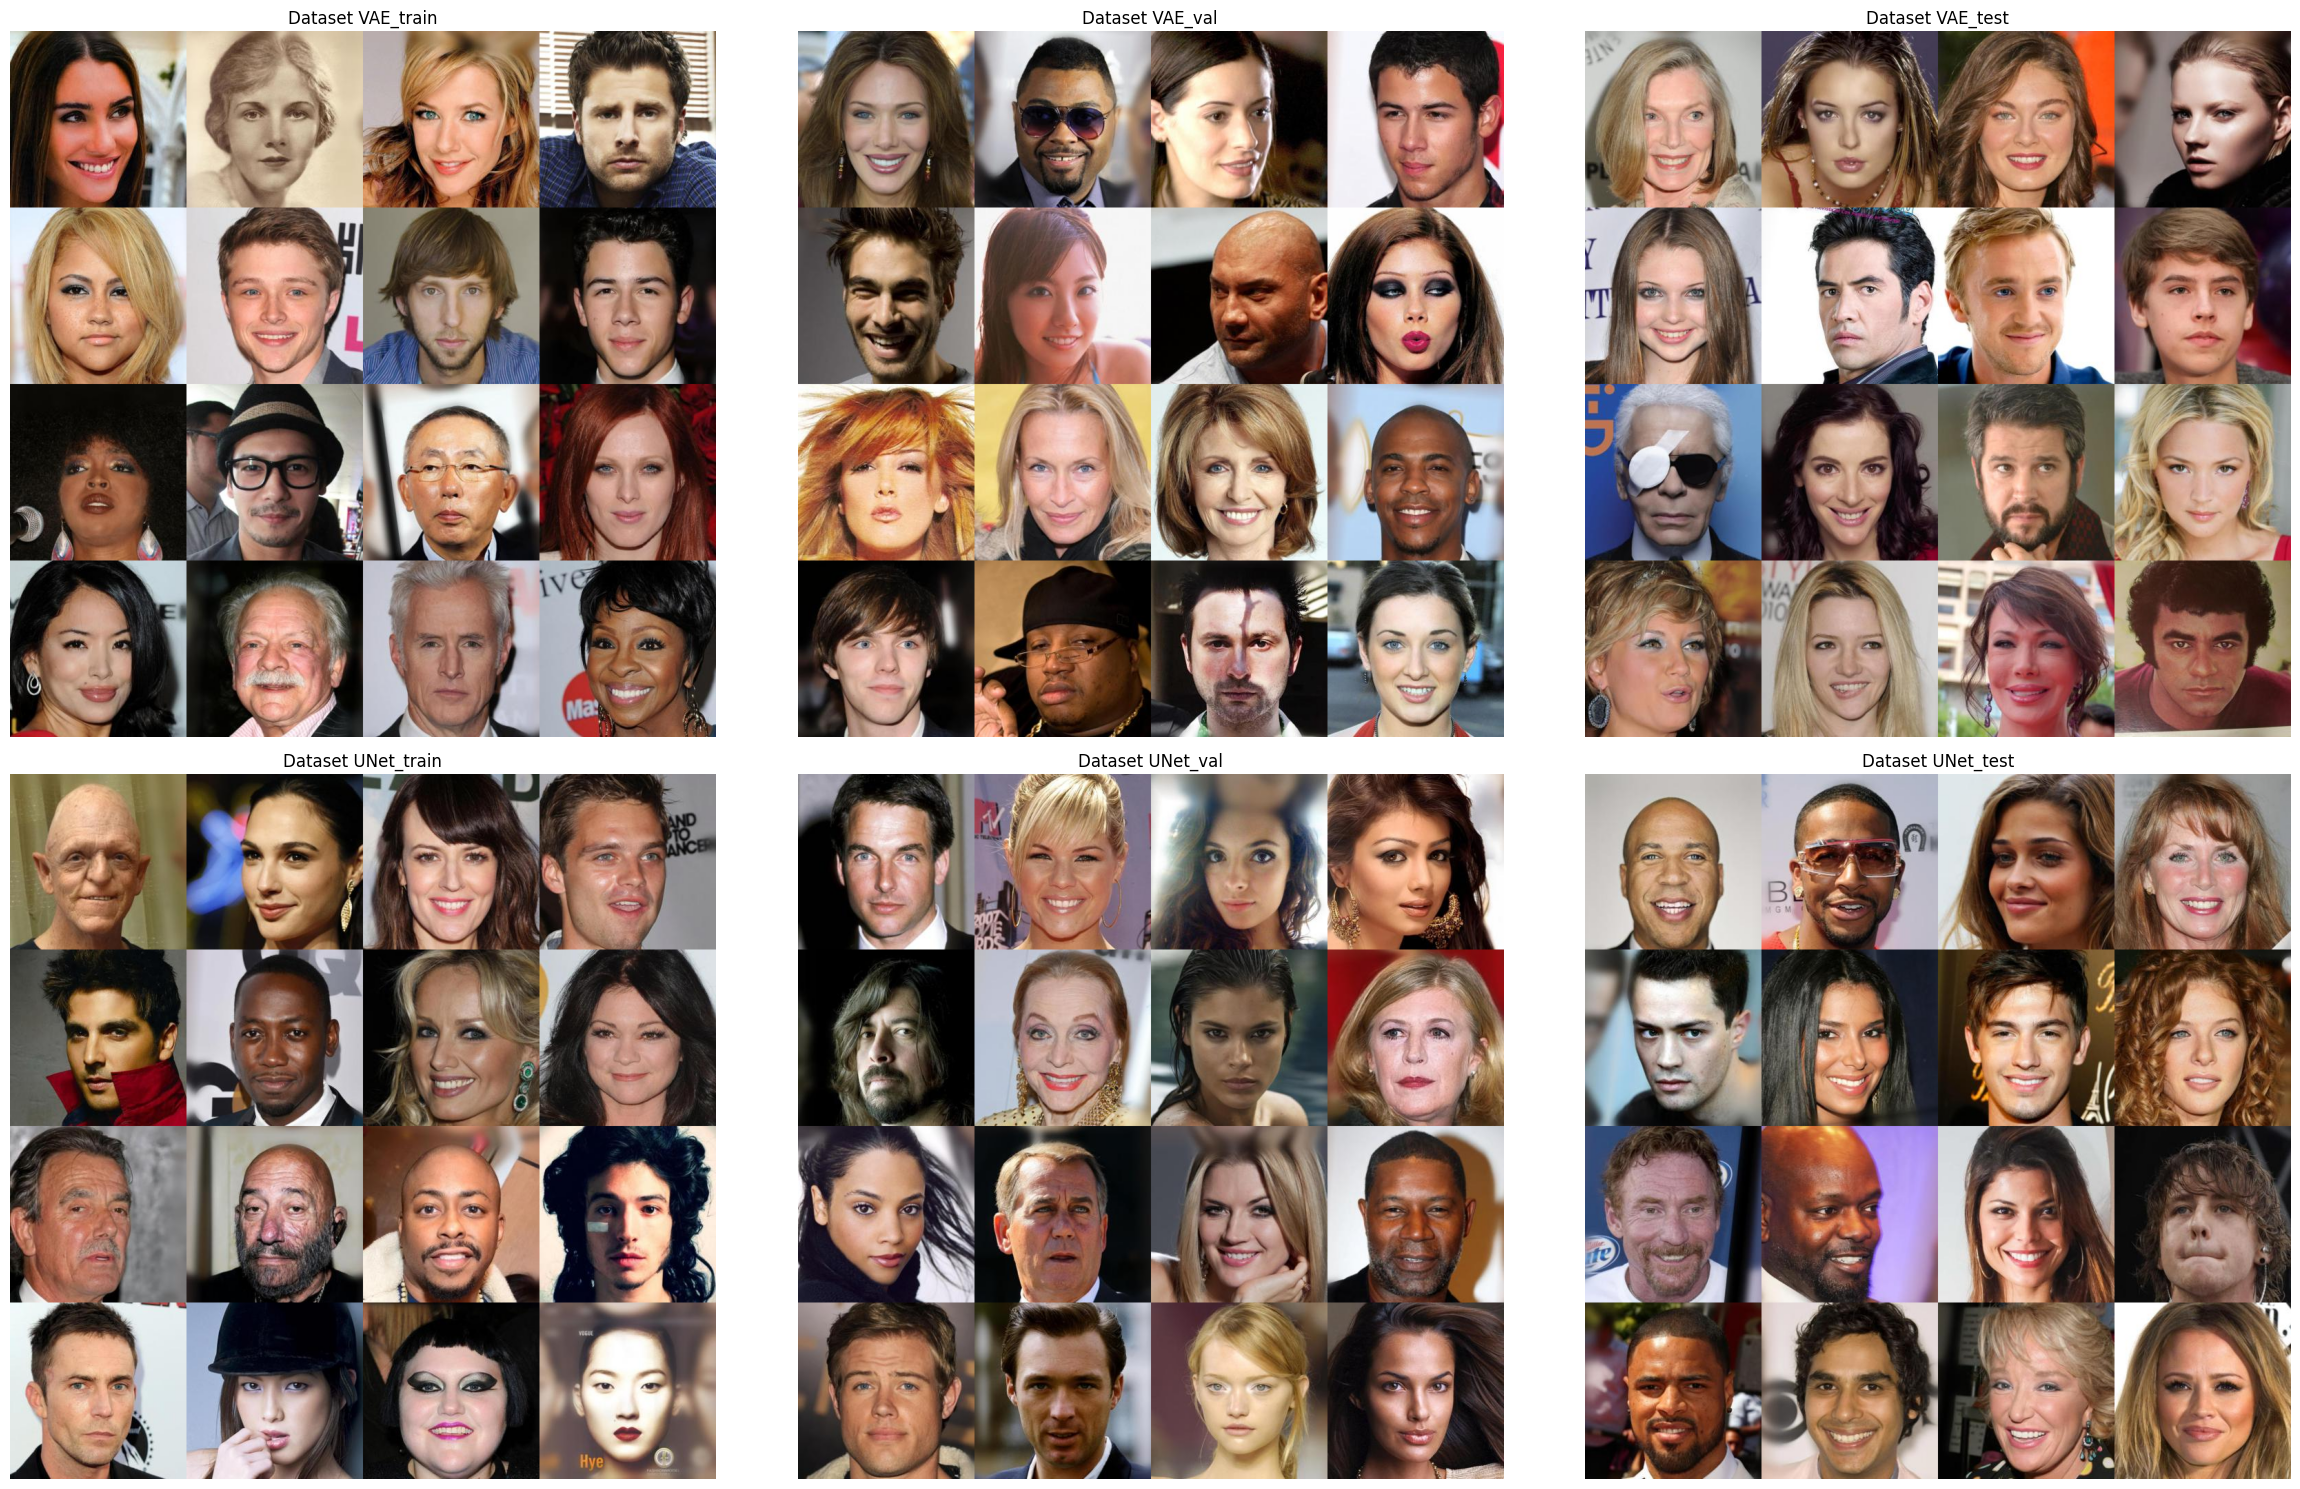

In [25]:
from torch.utils.data import Subset
import matplotlib.pyplot as plt
import numpy as np


def get_images(dataset: Subset, offset=0, count=16, size=(64, 64)):
    return [dataset[i].resize(size) for i in range(offset, offset+16)]


grid_size = (4, 4)
image_size = (256, 256)
offset = 24

fig, axes = plt.subplots(2, 3, figsize=(24, 15))
axes = axes.flatten()


# Process each dataset
i = 0
for name, folder in datasets.items():
    images = get_images(folder, offset=offset, size=image_size)

    # Create a grid image
    grid_image = np.zeros(
        (grid_size[0]*image_size[0], grid_size[1]*image_size[1], 3), dtype=np.uint8)
    for idx, img in enumerate(images):
        row = idx // grid_size[1]
        col = idx % grid_size[1]
        grid_image[row*image_size[0]:(row+1)*image_size[0], col*image_size[1]:(col+1)*image_size[1]] = img

    axes[i].imshow(grid_image)
    axes[i].axis('off')
    axes[i].set_title(f'Dataset {name}')
    i += 1

plt.tight_layout()
plt.show()